# EXERCISE 5.1
La funzione d'onda per l'atomo di idrogeno nello stato fondamentale e nel primo stato eccitato sono rispettivamente:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
La funzione d'onda è una descrizione matematica dello stato del sistema, ovvero da essa si può ricavare la probabilità che la particella si trovi nella posizione $\vec{r}$ al tempo $t$ attraverso la densitò di probabilità, ricavabile come  $|\Psi(\vec{r},t)|^2$.
Il valor medio della posizione per lo stato fondamentale e per lo stato eccitato risultano dunque esattamente
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

Lo scopo dell'esercizio è quello di valutare il valore medio della posizione nei due casi. Data la difficoltà della risoluzione della funzione analitica viene richiesto di utilizzare l'algoritmo di Metropolis. Questo algoritmo è un metodo che permette di computare qualsiasi funzione di densità simulando una catena di Markov e utilizzando tecniche di Rejection (ovvero è possibile accettare/rigettare il passo successivo della catena se non soddisfa particolari ipotesi). 
Questo metodo si basa sull'assunzione che la probabilità di transizione $K(x|y)$ possa esere vista come il prodotto tra la matrice di transizione $T(x|y)$ (matrice che tiene conto di tutte le possibili transizioni) e la probabilità di accettazione di una mossa $A(x|y)=min[1,\frac{T(y|x)p(x)}{T(x|y)p(y)}]$. 

L'algoritmo funziona dunque in questo modo:
   1. Viene generato un punto $x'$ secondo la matrice T(x|y)
   2. Viene valutata la probabilità di accettazione $A(x'|x_n)=\alpha$ ($x_n$ punto precedente nella catena)
   3. Viene generato uniformemente p tra $0$ e $1$
   4. La mossa $x_n ->x'$ viene accettata se p<=$\alpha$, altrimenti si rimane nel punto $x_n$
 
Nella prima fase del programma ho simulato il valor medio di r in unità del raggio di Bohr $a_0$ con una matrice di transizione $T(x|y)=unif[x_i-\delta,x_i+\delta]$. per una corretta esecuzione è necessario scegliere un giusto delta e un buon punto iniziale della catena di Markov. 
Per il punto di partenza $(x0,y0,z0)$ ho scelto il punto in cui la densità di probabilità ha valore massimo, ovvero per lo stato fondamentale il punto $(0,0,0)$ e per lo stato eccitato il punto $(1,1,1)$. Il parametro $\delta$ invece non deve essere troppo grande (altrimenti la maggior parte dei valori verrebbero rifiutati) ma neanche troppo piccolo, se no la catena presenterebbe un livello di autocorrelazione altissimo, e dunque non sarebbe una catena di Markov. Per questo solitamente si accetta un valore di $\delta$ tale per vengano accettai circa il 50% dei valori proposti ($\delta=1.25$ per lo stato fondamentale e $\delta=3e$ per lo stato eccitato).

Riporto di seguito gli scatterplot e l'andamento di $\left\langle r \right\rangle$ per lo stato fondamentale e lo stato eccitato (valor medio calcolato con metodo della media a blocchi per $M\ge 10^5$ ($100$ blocchi, ognuno da $1000$ steps).


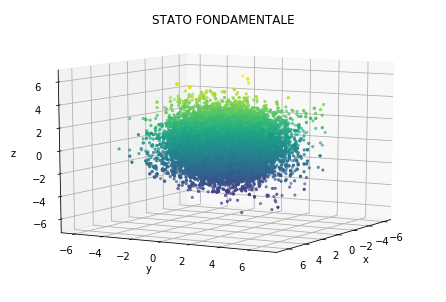

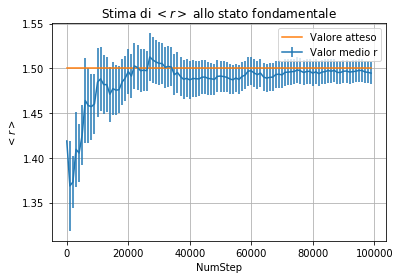

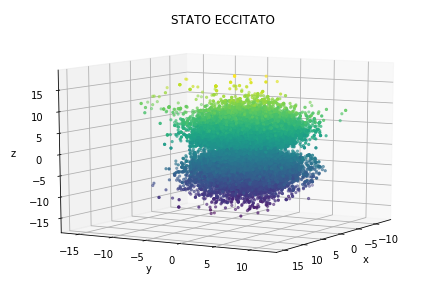

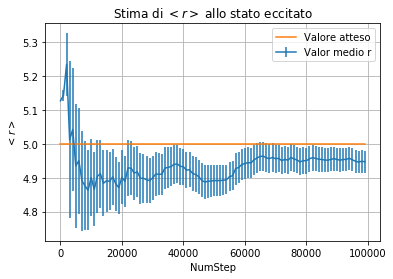

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

fond_unif=np.loadtxt("Fond_Unif_coord.dat")
rfond_unif=np.loadtxt("Fond_Unif.dat")
ecc_unif=np.loadtxt("Ecc_Unif_coord.dat")
recc_unif=np.loadtxt("Ecc_Unif.dat")
x=np.arange(100)*1000
rfond_att=np.ones(100)*3/2
recc_att=np.ones(100)*5

#Scatterplot e andamento di <r> misurato con media a blocchi con matrice di tranziozione Uniforme stato FONDAMENTALE
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(fond_unif[:,0], fond_unif[:,1], fond_unif[:,2], c=fond_unif[:,2], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("STATO FONDAMENTALE")
ax.view_init(10, 30)
plt.show()


plt.errorbar(x,rfond_unif[:,0],rfond_unif[:,1],label="Valor medio r")
plt.plot(x,rfond_att,label="Valore atteso")
plt.xlabel("NumStep")
plt.ylabel("$<r>$")
plt.title("Stima di $<r>$ allo stato fondamentale")
plt.legend()
plt.grid(True)
plt.show()


#Scatterplot e andamento di <r> misurato con media a blocchi con matrice di tranziozione Uniforme stato ECCITATO
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(ecc_unif[:,0], ecc_unif[:,1], ecc_unif[:,2], c=ecc_unif[:,2], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("STATO ECCITATO")
ax.view_init(10, 30)
plt.show()


plt.errorbar(x,recc_unif[:,0],recc_unif[:,1],label="Valor medio r")
plt.plot(x,recc_att,label="Valore atteso")
plt.xlabel("NumStep")
plt.ylabel("$<r>$")
plt.title("Stima di $<r>$ allo stato eccitato")
plt.legend()
plt.grid(True)
plt.show()

Come si può osservare dai grafici e degli scatterplot i valori medi del raggio tendono al valore teorico atteso. Le piccole discrepanze sono da ricercare probabilmente nel punto di partenza iniziale del calcolo.

Stesso procedimento è stato eseguito anche con una matrice di transizione bormale $T(x|y)=N(x_i,\delta ^2)$, con stessi punti iniziali per il calcolo e $\delta=0,75$ per lo stato fondamentale e $\delta=1,85$ per lo stato eccitato.

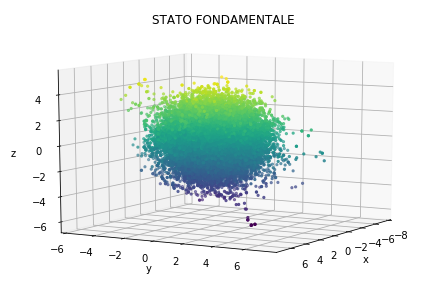

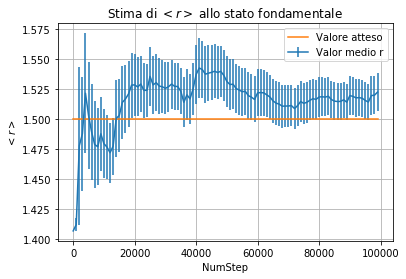

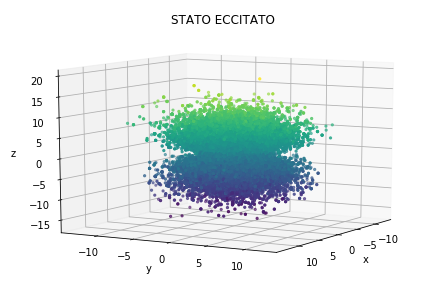

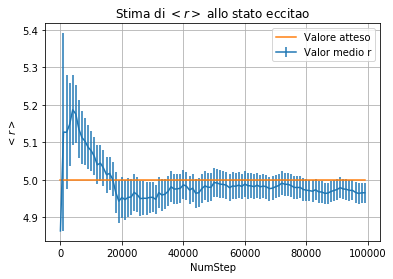

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

fond_gauss=np.loadtxt("Fond_Gauss_coord.dat")
r_gauss=np.loadtxt("Fond_Gauss.dat")
ecc_gauss=np.loadtxt("Ecc_Gauss_coord.dat")
recc_gauss=np.loadtxt("Ecc_Gauss.dat")
x=np.arange(100)*1000
r_att=np.ones(100)*3/2
recc_att=np.ones(100)*5

#Scatterplot e andamento di <r> misurato con media a blocchi con matrice di transiozione Normale stato FONDAMENTALE
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(fond_gauss[:,0], fond_gauss[:,1], fond_gauss[:,2], c=fond_gauss[:,2], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("STATO FONDAMENTALE")
ax.view_init(10, 30)
plt.show()


plt.errorbar(x,r_gauss[:,0],r_gauss[:,1],label="Valor medio r")
plt.plot(x,r_att,label="Valore atteso")
plt.xlabel("NumStep")
plt.ylabel("$<r>$")
plt.title("Stima di $<r>$ allo stato fondamentale")
plt.legend()
plt.grid(True)
plt.show()


#Scatterplot e andamento di <r> misurato con media a blocchi con matrice di transiozione Normale stato ECCITATO
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(ecc_gauss[:,0], ecc_gauss[:,1], ecc_gauss[:,2], c=ecc_gauss[:,2], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("STATO ECCITATO")
ax.view_init(10, 30)
plt.show()


plt.errorbar(x,recc_gauss[:,0],recc_gauss[:,1],label="Valor medio r")
plt.plot(x,recc_att,label="Valore atteso")
plt.xlabel("NumStep")
plt.ylabel("$<r>$")
plt.title("Stima di $<r>$ allo stato eccitao")
plt.legend()
plt.grid(True)
plt.show()

I risultati questo caso semnrano lievemente più precisi rispetto alla simulazione condotta con una matrice di transizione uniforme. Ritengo che la maggior precisione sia comunque più da ricercare in una migliore scelta dei parametri rispetto al caso precedentemente piuttosto che a una maggior precisione del metodo. 